<a href="https://colab.research.google.com/github/PRAN20/Dog-Cat-Kaggle/blob/main/Dog_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Header Files**

In [1]:
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt

# **Connecting to Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Extracting Data from Drive**

In [3]:
!unzip "/content/drive/MyDrive/dogs-vs-cats-redux-kernels-edition.zip" -d "DataBase"

Archive:  /content/drive/MyDrive/dogs-vs-cats-redux-kernels-edition.zip
  inflating: DataBase/sample_submission.csv  
  inflating: DataBase/test.zip       
  inflating: DataBase/train.zip      


In [4]:
cd DataBase

/content/DataBase


In [5]:
!unzip "/content/DataBase/train.zip" -d "Train"

Streaming output truncated to the last 5000 lines.
  inflating: Train/train/dog.5499.jpg  
  inflating: Train/train/dog.55.jpg  
  inflating: Train/train/dog.550.jpg  
  inflating: Train/train/dog.5500.jpg  
  inflating: Train/train/dog.5501.jpg  
  inflating: Train/train/dog.5502.jpg  
  inflating: Train/train/dog.5503.jpg  
  inflating: Train/train/dog.5504.jpg  
  inflating: Train/train/dog.5505.jpg  
  inflating: Train/train/dog.5506.jpg  
  inflating: Train/train/dog.5507.jpg  
  inflating: Train/train/dog.5508.jpg  
  inflating: Train/train/dog.5509.jpg  
  inflating: Train/train/dog.551.jpg  
  inflating: Train/train/dog.5510.jpg  
  inflating: Train/train/dog.5511.jpg  
  inflating: Train/train/dog.5512.jpg  
  inflating: Train/train/dog.5513.jpg  
  inflating: Train/train/dog.5514.jpg  
  inflating: Train/train/dog.5515.jpg  
  inflating: Train/train/dog.5516.jpg  
  inflating: Train/train/dog.5517.jpg  
  inflating: Train/train/dog.5518.jpg  
  inflating: Train/train/dog.5519

In [6]:
!unzip "/content/DataBase/test.zip" -d "Test"

Streaming output truncated to the last 5000 lines.
  inflating: Test/test/5499.jpg      
  inflating: Test/test/55.jpg        
  inflating: Test/test/550.jpg       
  inflating: Test/test/5500.jpg      
  inflating: Test/test/5501.jpg      
  inflating: Test/test/5502.jpg      
  inflating: Test/test/5503.jpg      
  inflating: Test/test/5504.jpg      
  inflating: Test/test/5505.jpg      
  inflating: Test/test/5506.jpg      
  inflating: Test/test/5507.jpg      
  inflating: Test/test/5508.jpg      
  inflating: Test/test/5509.jpg      
  inflating: Test/test/551.jpg       
  inflating: Test/test/5510.jpg      
  inflating: Test/test/5511.jpg      
  inflating: Test/test/5512.jpg      
  inflating: Test/test/5513.jpg      
  inflating: Test/test/5514.jpg      
  inflating: Test/test/5515.jpg      
  inflating: Test/test/5516.jpg      
  inflating: Test/test/5517.jpg      
  inflating: Test/test/5518.jpg      
  inflating: Test/test/5519.jpg      
  inflating: Test/test/552.jpg       

# **Plotting Images and Checking Results**

In [8]:
from PIL import Image
image = Image.open("/content/DataBase/Test/test/1.jpg")
image1 = Image.open("/content/DataBase/Test/test/10.jpg")

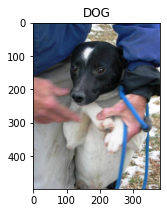

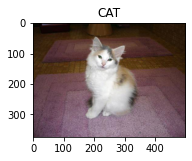

In [9]:
plt.figure(figsize = (5,5))
plt.subplot(1,2,1)
plt.title("DOG")
plt.imshow(image)
plt.show()

plt.subplot(1,2,2)
plt.title("CAT")
plt.imshow(image1)
plt.show()

# **Importing TensorFlow Files**

In [10]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [13]:
tf.__version__

'2.7.0'

# **Building Model**

**Dealing with the Training Set**

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/DataBase/Train',target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 25000 images belonging to 1 classes.


**Dealing with the Test Sets**

In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/DataBase/Test',target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 12500 images belonging to 1 classes.


# **Building the CNN**

In [17]:
cnn = tf.keras.models.Sequential()

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [19]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [21]:
cnn.add(tf.keras.layers.Flatten())

In [22]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [23]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# **Training the Model**

In [24]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 1)

782/782 [==============================] - 136s 174ms/step - loss: 3.2622e-11 - accuracy: 1.0000 - val_loss: 1.6381e-11 - val_accuracy: 1.0000


In [28]:
cnn.save('Dog_Cat.hdf5')

In [32]:
pred_labels = cnn.predict(test_set, batch_size = 32)
pred_str_labels = ['dog' if num > 0.5 else 'cat' for num in pred_labels]